# Overview
- Transfer Learning project
- Use the model given from [Samuel Mohebban's project](https://github.com/HeeebsInc/FaceMaskEmotionDetection) as a base
    - Implement a goal from his Future Directions section
        - "More data. So far, this model has trouble detecting a mask when a person is wearing glasses. Using more images with people that wear glasses will get better results"
    
# Goals
- Model
    - 
- Images
    - Start: Possible data source for glasses without mask
        - https://www.kaggle.com/jeffheaton/glasses-or-no-glasses
        - Use json credentials as demonstrated in class

        

# 1. Setup

## 1.1 Imports

In [11]:
import zipfile
import os
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import shutil
import errno
import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator

random.seed(2020)

## 1.2 Creating Folders

In [12]:
base_dir = "Images"
folders = ["Train", "Test", "Validation"]
categories  =  ["No_Mask", "Mask"]

try:
    os.mkdir(base_dir)
    #os.mkdir(os.path.join(os.getcwd(), base_dir))
except OSError as exc:
    if exc.errno != errno.EEXIST:
        raise
    pass

# Create folders for train, test, and validation
for folder in folders:
    try:
        os.mkdir(os.path.join(base_dir, folder))
    except OSError as exc:
        if exc.errno != errno.EEXIST:
            raise
    pass

    # Within each folder, create a mask and no mask folder
    for cat in categories:
        try:
            os.mkdir(os.path.join(base_dir, folder, cat))
        except OSError as exc:
            if exc.errno != errno.EEXIST:
                raise
            pass

In [79]:
try:
    os.mkdir("Models")
    #os.mkdir(os.path.join(os.getcwd(), base_dir))
except OSError as exc:
    if exc.errno != errno.EEXIST:
        raise
    pass

# 2. Connect to new dataset of face images ([Kaggle](https://www.kaggle.com/jeffheaton/glasses-or-no-glasses))

## 2.1. Get Kaggle API Credentials
- Kaggle.json ([source](https://github.com/Kaggle/kaggle-api))
- Mobilenet_Masks.h5 ([source](https://github.com/HeeebsInc/FaceMaskEmotionDetection/blob/master/ModelWeights/Mobilenet_Masks.h5))

In [13]:
from google.colab import files
data_to_load = files.upload()

In [14]:
data_to_load = files.upload()

Saving Mobilenet_Masks.h5 to Mobilenet_Masks.h5


Set permissions

In [15]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

## 2.2 Glasses vs No Glasses dataset

In [16]:
# pip install kaggle

In [17]:
# !kaggle datasets download -d jeffheaton/glasses-or-no-glasses

In [18]:
# zip_ref = zipfile.ZipFile('glasses-or-no-glasses.zip', 'r')
# zip_ref.extractall('files')
# zip_ref.close()

## 2.3 Using the Images scraped from a previous project  to test
- Link to project GitHub [Repository](https://github.com/miles-frankllin/Data_603)
- Link to images uploaded to kaggle from that project [here](https://www.kaggle.com/milesfranklin/mask-detection)

In [19]:
# !kaggle datasets download -d milesfranklin/mask-detection

In [20]:
# zip_ref = zipfile.ZipFile('mask-detection.zip', 'r')
# zip_ref.extractall('files')
# zip_ref.close()

In [21]:
# base ="/content/files/CNN_Images"
# dest = "Images"

# for t in ["Train", "Test"]:
#   for m in ["No_Mask", "Mask"]:
#     try:
#         for file in os.listdir(os.path.join(base, t, m)):
            
#             #print(file)
#             src = os.path.join(base, t, m, file)
#             dst = os.path.join(dest, "Test", m, file)
#             shutil.copyfile(src, dst)

#     except:
#       pass

In [22]:
# for t in ["Train", "Test"]:
#   for m in ["No_Mask", "Mask"]:
#     path = os.path.join(base_dir, t, m)
#     print("len({})    \t".format(path), len(os.listdir(path)))

## 2.4 Additional Dataset of 4000 Images ([Kaggle](https://www.kaggle.com/aneerbanchakraborty/face-mask-detection-data))

In [23]:
!kaggle datasets download -d aneerbanchakraborty/face-mask-detection-data

 95% 120M/127M [00:00<00:00, 138MB/s]
100% 127M/127M [00:00<00:00, 152MB/s]


In [24]:
zip_ref = zipfile.ZipFile('face-mask-detection-data.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()

Mask

In [25]:
original_dataset_dir = "/content/files/with_mask"

train, test = train_test_split(os.listdir(original_dataset_dir), test_size =.2)
test, val = train_test_split(test, test_size =.5)


for file in train:
    src = os.path.join(original_dataset_dir, file)
    dst = os.path.join(base_dir, "Train", "Mask", file)
    shutil.copyfile(src, dst)

for file in test:
    src = os.path.join(original_dataset_dir, file)
    dst = os.path.join(base_dir, "Test", "Mask", file)
    shutil.copyfile(src, dst)

for file in val:
    src = os.path.join(original_dataset_dir, file)
    dst = os.path.join(base_dir, "Validation", "Mask", file)
    shutil.copyfile(src, dst)

No Mask

In [26]:
original_dataset_dir = "/content/files/without_mask"

train, test = train_test_split(os.listdir(original_dataset_dir), test_size =.2)
test, val = train_test_split(test, test_size =.5)


for file in train:
    src = os.path.join(original_dataset_dir, file)
    dst = os.path.join(base_dir, "Train", "No_Mask", file)
    shutil.copyfile(src, dst)

for file in test:
    src = os.path.join(original_dataset_dir, file)
    dst = os.path.join(base_dir, "Test", "No_Mask", file)
    shutil.copyfile(src, dst)

for file in val:
    src = os.path.join(original_dataset_dir, file)
    dst = os.path.join(base_dir, "Validation", "No_Mask", file)
    shutil.copyfile(src, dst)

In [27]:
for t in ["Train", "Test", "Validation"]:
  for m in ["Mask", "No_Mask"]:
    path = os.path.join(base_dir, t, m)
    print("len({})    \t".format(path), len(os.listdir(path)))

len(Images/Train/No_Mask)    	 1534
len(Images/Train/Mask)    	 1532
len(Images/Test/No_Mask)    	 192
len(Images/Test/Mask)    	 191
len(Images/Validation/No_Mask)    	 192
len(Images/Validation/Mask)    	 192


## 2.5 Additional Dataset of 1237 Images ([Kaggle](https://www.kaggle.com/harry418/dataset-for-mask-detection))

In [28]:
!kaggle datasets download -d harry418/dataset-for-mask-detection

 75% 18.0M/23.9M [00:00<00:00, 184MB/s]
100% 23.9M/23.9M [00:00<00:00, 153MB/s]


In [29]:
zip_ref = zipfile.ZipFile('dataset-for-mask-detection.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()

Mask

In [30]:
original_dataset_dir = "/content/files/dataset/with_mask"

train, test = train_test_split(os.listdir(original_dataset_dir), test_size =.2)
test, val = train_test_split(test, test_size =.5)

for file in train:
    src = os.path.join(original_dataset_dir, file)
    dst = os.path.join(base_dir, "Train", "Mask", file)
    shutil.copyfile(src, dst)

for file in test:
    src = os.path.join(original_dataset_dir, file)
    dst = os.path.join(base_dir, "Test", "Mask", file)
    shutil.copyfile(src, dst)

for file in val:
    src = os.path.join(original_dataset_dir, file)
    dst = os.path.join(base_dir, "Validation", "Mask", file)
    shutil.copyfile(src, dst)

No Mask

In [31]:
original_dataset_dir = "/content/files/dataset/without_mask"

train, test = train_test_split(os.listdir(original_dataset_dir), test_size =.2)
test, val = train_test_split(test, test_size =.5)

for file in train:
    src = os.path.join(original_dataset_dir, file)
    dst = os.path.join(base_dir, "Train", "No_Mask", file)
    shutil.copyfile(src, dst)

for file in test:
    src = os.path.join(original_dataset_dir, file)
    dst = os.path.join(base_dir, "Test", "No_Mask", file)
    shutil.copyfile(src, dst)

for file in val:
    src = os.path.join(original_dataset_dir, file)
    dst = os.path.join(base_dir, "Validation", "No_Mask", file)
    shutil.copyfile(src, dst)

In [32]:
for t in ["Train", "Test", "Validation"]:
  for m in ["Mask", "No_Mask"]:
    path = os.path.join(base_dir, t, m)
    print("len({})    \t".format(path), len(os.listdir(path)))

len(Images/Train/No_Mask)    	 1968
len(Images/Train/Mask)    	 2087
len(Images/Test/No_Mask)    	 246
len(Images/Test/Mask)    	 260
len(Images/Validation/No_Mask)    	 247
len(Images/Validation/Mask)    	 262


# 3. Split data
> Train = 80% <br>
> Test = 10% <br>
> Val = 10% <br>

In [38]:
gen = ImageDataGenerator(rescale=1./255,
                         
                          # Using Same paramters as base bodel
                          rotation_range = 40, 
                          width_shift_range = .2, 
                          height_shift_range = .2, 
                          horizontal_flip = True, shear_range = .15, 
                          fill_mode = 'nearest', 
                          zoom_range = .15)

train_generator = gen.flow_from_directory(
        "/content/Images/Train",
        target_size=(224, 224),
        class_mode='binary')

val_generator = gen.flow_from_directory(
        "/content/Images/Validation",
        target_size=(224, 224),
        class_mode='binary')

test_generator = gen.flow_from_directory(
        "/content/Images/Test",
        target_size=(224, 224),
        class_mode='binary')

Found 4055 images belonging to 2 classes.
Found 509 images belonging to 2 classes.
Found 506 images belonging to 2 classes.


# 4. Get base model from Samuel Mohebban's [Github Repository](https://github.com/HeeebsInc/FaceMaskEmotionDetection)
Doesn't work, so just went to the link and downloaded it manually.

In [39]:
# !git clone https://github.com/HeeebsInc/FaceMaskEmotionDetection/blob/master/ModelWeights/Mobilenet_Masks.h5

Manually upload this [file](https://github.com/HeeebsInc/FaceMaskEmotionDetection/blob/master/ModelWeights/Mobilenet_Masks.h5)

In [40]:
# data_to_load = files.upload()

In [42]:
# base_model = tf.keras.models.load_model(os.path.join("Mobilenet_Masks.h5"))
base_model = tf.keras.models.load_model("/content/Mobilenet_Masks.h5")

# 5. Confusion Matrix for Base Model

```
len(Images/Test/Mask):      522
len(Images/Test/No_Mask):   794
So, desired matrix is:

      True Mask  (522)| False No_Mask (0)
      ----------------|------------------
      False Mask (0)  | True No_Mask (794)
```



In [121]:
for t in ["Train", "Test", "Validation"]:
  for m in ["No_Mask", "Mask"]:
    path = os.path.join(base_dir, t, m)
    print("len({})    \t".format(path), len(os.listdir(path)))

len(Images/Train/No_Mask)    	 1968
len(Images/Train/Mask)    	 2087
len(Images/Test/No_Mask)    	 246
len(Images/Test/Mask)    	 260
len(Images/Validation/No_Mask)    	 247
len(Images/Validation/Mask)    	 262


In [258]:
y_pred = base_model.predict_classes(val_generator)
y_true = val_generator.labels

target_names = ["Mask", "No_Mask"]
print(classification_report(y_true, y_pred, target_names=target_names))

cm_val = np.array(tf.math.confusion_matrix(y_true, y_pred))
cm_val

              precision    recall  f1-score   support

        Mask       0.55      0.04      0.08       262
     No_Mask       0.49      0.96      0.65       247

    accuracy                           0.49       509
   macro avg       0.52      0.50      0.36       509
weighted avg       0.52      0.49      0.35       509



array([[ 11, 251],
       [  9, 238]], dtype=int32)

In [259]:
y_pred = base_model.predict_classes(test_generator)
y_true = test_generator.labels

target_names = ["Mask", "No_Mask"]
print(classification_report(y_true, y_pred, target_names=target_names))

cm_test = np.array(tf.math.confusion_matrix(y_true, y_pred))
cm_test

              precision    recall  f1-score   support

        Mask       0.54      0.05      0.09       260
     No_Mask       0.49      0.96      0.65       246

    accuracy                           0.49       506
   macro avg       0.51      0.50      0.37       506
weighted avg       0.52      0.49      0.36       506



array([[ 13, 247],
       [ 11, 235]], dtype=int32)

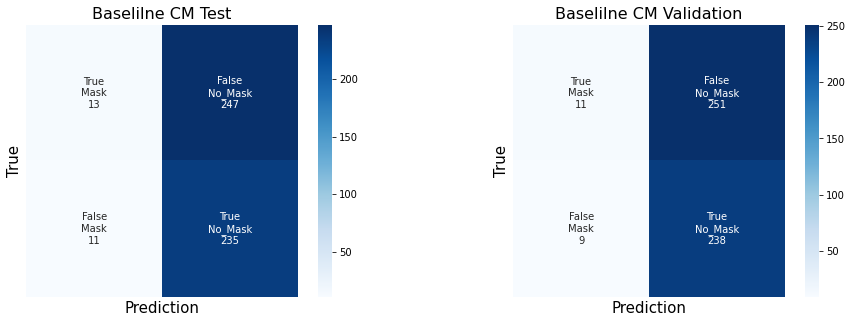

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

In [260]:
fig, (ax_test, ax_val) = plt.subplots(1,2,figsize=(16, 5))
# fig.suptitle('Base Confusion Matricies', fontsize=24)

labels_test = [["True\nMask\n{}".format(cm_test[0][0]),
           "False\nNo_Mask\n{}".format(cm_test[0][1])],
          ["False\nMask\n{}".format(cm_test[1][0]), 
           "True\nNo_Mask\n{}".format(cm_test[1][1])]]

labels_val = [["True\nMask\n{}".format(cm_val[0][0]),
           "False\nNo_Mask\n{}".format(cm_val[0][1])],
          ["False\nMask\n{}".format(cm_val[1][0]), 
           "True\nNo_Mask\n{}".format(cm_val[1][1])]]
plt.figure(figsize = (15,10))
sns.heatmap(cm_test, annot=labels_test, fmt="", cmap="Blues", ax = ax_test,
            xticklabels=False, 
            yticklabels=False)
plt.figure(figsize = (15,10))
sns.heatmap(cm_val, annot=labels_val, fmt="", cmap="Blues", ax = ax_val,
            xticklabels=False, 
            yticklabels=False)

ax_test.set(adjustable='box', aspect='equal')
ax_val.set(adjustable='box', aspect='equal')

ax_test.set_title("Baselilne CM Test", fontdict={"fontsize":16})
ax_val.set_title("Baselilne CM Validation", fontdict={"fontsize":16})

ax_test.set_xlabel("Prediction", fontdict={"fontsize":15})
ax_test.set_ylabel("True", fontdict={"fontsize":15})

ax_val.set_xlabel("Prediction", fontdict={"fontsize":15})
ax_val.set_ylabel("True", fontdict={"fontsize":15})

plt.show()

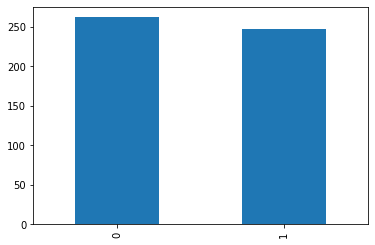

In [53]:
pd.DataFrame(y_true.flatten())[0].value_counts().plot(kind="bar")

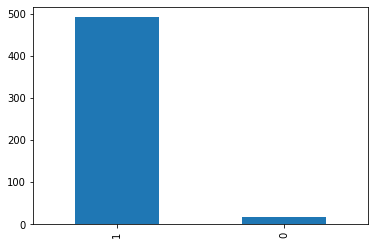

In [54]:
pd.DataFrame(y_pred.flatten())[0].value_counts().plot(kind="bar")

In [55]:
# base_model.summary()

# 6.  Add New Layers to Base Model

MobileNet Architecture

In [56]:
# base_model.layers[0].summary()

Base Architecture


In [57]:
 base_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
average_pooling2d_1 (Average (None, 1, 1, 1280)        0         
_________________________________________________________________
flatten (Flatten)            (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               327936    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
Output (Dense)               (None, 2)                 514       
Total params: 2,586,434
Trainable params: 328,450
Non-trainable params: 2,257,984
______________________________________

## 6.1 Adding 3 Dense Layers

In [58]:
model = tf.keras.models.Sequential()

# Build off of base model
for layer in base_model.layers[:-1]:
    model.add(layer)

# Freeze Layers
for layer in model.layers: 
    layer.trainable = False

model.add(tf.keras.layers.Dense(2**8, activation='relu', name="Transfer_Learning_1"))
model.add(tf.keras.layers.Dense(2**8, activation='relu', name="Transfer_Learning_2"))
model.add(tf.keras.layers.Dense(2**8, activation='relu', name="Transfer_Learning_3"))
model.add(tf.keras.layers.Dense(1, activation='sigmoid', name="Transfer_Learning_Output"))

model.summary()
model.compile(optimizer='adam', loss='binary_crossentropy')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
average_pooling2d_1 (Average (None, 1, 1, 1280)        0         
_________________________________________________________________
flatten (Flatten)            (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               327936    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
Transfer_Learning_1 (Dense)  (None, 256)               65792     
_________________________________________________________________
Transfer_Learning_2 (Dense)  (None, 256)               6

## 6.2 Adding a CNN Layer and a Dense Layer
Not Sure how to impliment yet. Still trying to figure out how to add Conv Layer if input shape is (None, 1, 1, 1280)).

In [268]:
# model_2 = tf.keras.models.Sequential()

# # Build off of base model
# for layer in base_model.layers[:-4]:
#     model_2.add(layer)

# model_2.summary()

In [269]:
# model_2 = tf.keras.models.Sequential()

# # Build off of base model
# for layer in base_model.layers[:-4]:
#     model_2.add(layer)

# model_2.summary()

# # Freeze Layers
# for layer in model_2.layers: 
#     layer.trainable = False

# # Conv Layer (trying to figure out how to add Conv Layer if input shape is (None, 1, 1, 1280))
# model_2.add(tf.keras.layers.Conv2D(128, (3,3), name="Transfer_Learning_Conv2D_1"))
# model_2.add(tf.keras.layers.MaxPooling2D((2,2), name="Transfer_Learning_MaxPool_2"))
# model_2.add(tf.keras.layers.Flatten(name="Transfer_Learning_Flat_3"), )

# # Inner Dense Layer
# model_2.add(tf.keras.layers.Dense(2**8, activation='relu', name="Transfer_Learning_Dense_4"))

# # Output Layer
# model_2.add(tf.keras.layers.Dense(1, activation='sigmoid', name="Transfer_Learning_Output"))

# model_2.summary()
# model_2.compile(optimizer='adam', loss='binary_crossentropy')

# 7. Run New Model

In [60]:
# # %%time 
# history = model.fit(train_generator, 
#                     epochs=2,
#                     validation_data = test_generator)


## 7.1 



Afterwards come back and tweak his model.

He runs until specfic plateau conditions are met.

In [61]:
csv = tf.keras.callbacks.CSVLogger(
    filename="/content/Model/Transfer_Learning_Model_History.csv", 
    separator=',', append=False
)

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto',
    baseline=None, restore_best_weights=True
)

check_point = tf.keras.callbacks.ModelCheckpoint(
    filepath="/content/Model/Transfer_Learning_Model.h5", 
    monitor='val_loss', verbose=1, save_best_only=True
)

plateau = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='min'
)

In [62]:
history = model.fit(train_generator, 
                    epochs=30,
                    validation_data = val_generator,
                    callbacks=[early_stop, check_point, plateau])

# model.fit()

Epoch 1/30
 20/127 [===>..........................] - ETA: 41s - loss: 0.6967

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


127/127 [==============================] - ETA: 0s - loss: 0.4996
Epoch 00001: val_loss improved from inf to 0.34948, saving model to /content/Model/Transfer_Learning_Model.h5
127/127 [==============================] - 59s 464ms/step - loss: 0.4996 - val_loss: 0.3495
Epoch 2/30
127/127 [==============================] - ETA: 0s - loss: 0.4111
Epoch 00002: val_loss did not improve from 0.34948
127/127 [==============================] - 57s 448ms/step - loss: 0.4111 - val_loss: 0.3994
Epoch 3/30
127/127 [==============================] - ETA: 0s - loss: 0.3936
Epoch 00003: val_loss did not improve from 0.34948
127/127 [==============================] - 57s 446ms/step - loss: 0.3936 - val_loss: 0.3811
Epoch 4/30
127/127 [==============================] - ETA: 0s - loss: 0.3949
Epoch 00004: val_loss improved from 0.34948 to 0.32125, saving model to /content/Model/Transfer_Learning_Model.h5
127/127 [==============================] - 56s 444ms/step - loss: 0.3949 - val_loss: 0.3212
Epoch 5/3

In [88]:
# model.save("model_30-epochs.h5")

# model = tf.keras.models.load_model("/content/Model_Mask_vs_No_Mask_1237_4000.h5")

## 7.2 Addtional Round of Training

In [95]:
model = tf.keras.models.load_model("/content/model_30-epochs.h5")

history = model.fit(train_generator, 
                    epochs=30,
                    validation_data = val_generator,
                    callbacks=[early_stop, check_point, plateau])


Epoch 1/30
 63/127 [=============>................] - ETA: 24s - loss: 0.3620

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


127/127 [==============================] - ETA: 0s - loss: 0.3488
Epoch 00001: val_loss did not improve from 0.27353
127/127 [==============================] - 57s 447ms/step - loss: 0.3488 - val_loss: 0.3054
Epoch 2/30
127/127 [==============================] - ETA: 0s - loss: 0.3386
Epoch 00002: val_loss did not improve from 0.27353
127/127 [==============================] - 56s 442ms/step - loss: 0.3386 - val_loss: 0.3129
Epoch 3/30
127/127 [==============================] - ETA: 0s - loss: 0.3412
Epoch 00003: val_loss did not improve from 0.27353
127/127 [==============================] - 57s 446ms/step - loss: 0.3412 - val_loss: 0.2897
Epoch 4/30
127/127 [==============================] - ETA: 0s - loss: 0.3440
Epoch 00004: val_loss did not improve from 0.27353
127/127 [==============================] - 56s 438ms/step - loss: 0.3440 - val_loss: 0.3078
Epoch 5/30
127/127 [==============================] - ETA: 0s - loss: 0.3424
Epoch 00005: val_loss did not improve from 0.27353
127

In [96]:
# model.save("model_47-epochs.h5")

# 8. Evaulate

Test

In [271]:
y_pred = model.predict_classes(test_generator)
y_pred = y_pred.flatten()
y_true = test_generator.labels

target_names = ["Mask", "No_Mask"]
print(classification_report(y_true, y_pred, target_names=target_names))

cm_test = np.array(tf.math.confusion_matrix(y_true, y_pred))

              precision    recall  f1-score   support

        Mask       0.51      0.52      0.51       260
     No_Mask       0.48      0.47      0.47       246

    accuracy                           0.49       506
   macro avg       0.49      0.49      0.49       506
weighted avg       0.49      0.49      0.49       506



Val

In [272]:
y_pred = model.predict_classes(val_generator)
y_pred = y_pred.flatten()
y_true = val_generator.labels

target_names = ["Mask", "No_Mask"]
print(classification_report(y_true, y_pred, target_names=target_names))

cm_val = np.array(tf.math.confusion_matrix(y_true, y_pred))

              precision    recall  f1-score   support

        Mask       0.54      0.55      0.54       262
     No_Mask       0.51      0.51      0.51       247

    accuracy                           0.53       509
   macro avg       0.53      0.53      0.53       509
weighted avg       0.53      0.53      0.53       509



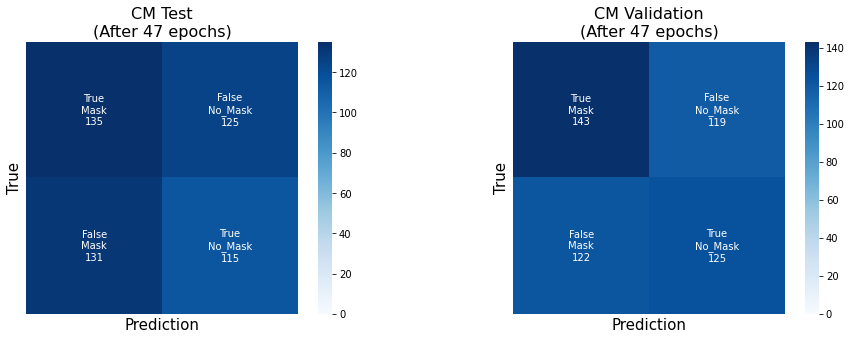

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

In [273]:
fig, (ax_test, ax_val) = plt.subplots(1,2,figsize=(16, 5))
# fig.suptitle('Base Confusion Matricies', fontsize=24)

labels_test = [["True\nMask\n{}".format(cm_test[0][0]),
           "False\nNo_Mask\n{}".format(cm_test[0][1])],
          ["False\nMask\n{}".format(cm_test[1][0]), 
           "True\nNo_Mask\n{}".format(cm_test[1][1])]]

labels_val = [["True\nMask\n{}".format(cm_val[0][0]),
           "False\nNo_Mask\n{}".format(cm_val[0][1])],
          ["False\nMask\n{}".format(cm_val[1][0]), 
           "True\nNo_Mask\n{}".format(cm_val[1][1])]]
plt.figure(figsize = (15,10))
sns.heatmap(cm_test, annot=labels_test, fmt="", cmap="Blues", 
            vmin=0, ax = ax_test,
            xticklabels=False, 
            yticklabels=False)
plt.figure(figsize = (15,10))
sns.heatmap(cm_val, annot=labels_val, fmt="", cmap="Blues", 
            vmin=0 , ax = ax_val,
            xticklabels=False, 
            yticklabels=False)

ax_test.set(adjustable='box', aspect='equal')
ax_val.set(adjustable='box', aspect='equal')

ax_test.set_title("CM Test\n(After 47 epochs)", fontdict={"fontsize":16})
ax_val.set_title("CM Validation\n(After 47 epochs)", fontdict={"fontsize":16})

ax_test.set_xlabel("Prediction", fontdict={"fontsize":15})
ax_test.set_ylabel("True", fontdict={"fontsize":15})

ax_val.set_xlabel("Prediction", fontdict={"fontsize":15})
ax_val.set_ylabel("True", fontdict={"fontsize":15})

plt.show()

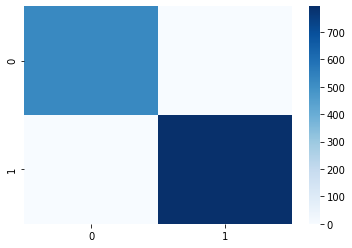

In [212]:
sns.heatmap([[522, 0],[0, 794]], fmt="", cmap="Blues")

In [71]:
# model.save("/content/Model_Mask_vs_No_Mask_1237_4000.h5")

# 9. Addtional Graphs

## 9.1 Base Model

In [261]:
cm_test = [[475, 8],
            [3, 506]]

cm_val = [[390, 10],
          [3, 397]]

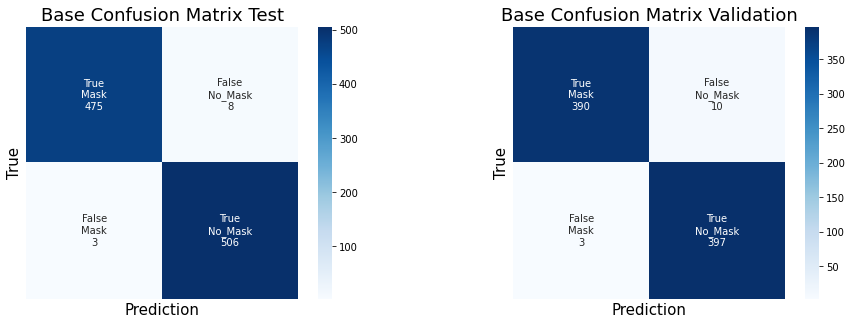

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

In [262]:

fig, (ax_test, ax_val) = plt.subplots(1,2,figsize=(16, 5))
# fig.suptitle('Base Confusion Matricies', fontsize=24)

labels_test = [["True\nMask\n{}".format(cm_test[0][0]),
           "False\nNo_Mask\n{}".format(cm_test[0][1])],
          ["False\nMask\n{}".format(cm_test[1][0]), 
           "True\nNo_Mask\n{}".format(cm_test[1][1])]]

labels_val = [["True\nMask\n{}".format(cm_val[0][0]),
           "False\nNo_Mask\n{}".format(cm_val[0][1])],
          ["False\nMask\n{}".format(cm_val[1][0]), 
           "True\nNo_Mask\n{}".format(cm_val[1][1])]]
plt.figure(figsize = (15,10))
sns.heatmap(cm_test, annot=labels_test, fmt="", cmap="Blues", ax = ax_test,
            xticklabels=False, 
            yticklabels=False)
plt.figure(figsize = (15,10))
sns.heatmap(cm_val, annot=labels_val, fmt="", cmap="Blues", ax = ax_val,
            xticklabels=False, 
            yticklabels=False)

ax_test.set(adjustable='box', aspect='equal')
ax_val.set(adjustable='box', aspect='equal')

ax_test.set_title("Base Confusion Matrix Test", fontdict={"fontsize":18})
ax_val.set_title("Base Confusion Matrix Validation", fontdict={"fontsize":18})

ax_test.set_xlabel("Prediction", fontdict={"fontsize":15})
ax_test.set_ylabel("True", fontdict={"fontsize":15})

ax_val.set_xlabel("Prediction", fontdict={"fontsize":15})
ax_val.set_ylabel("True", fontdict={"fontsize":15})

plt.show()

## 9.2 Displaying Images

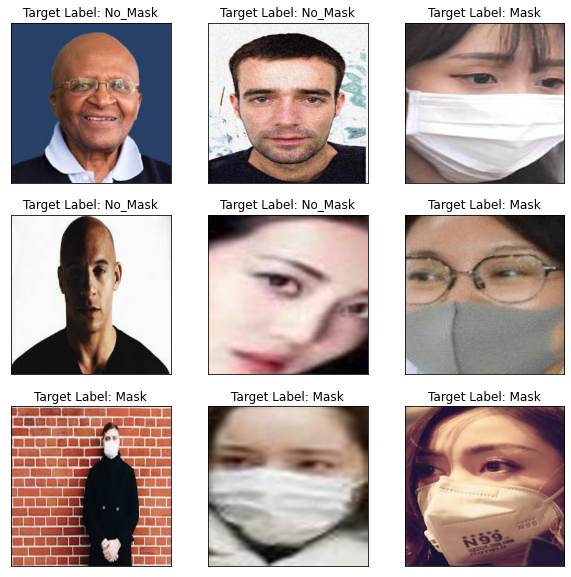

In [203]:
import matplotlib.image as mpimg
from PIL import Image
fig = plt.figure(figsize=(10, 10))

for i in range(1, 10):
    # im = mpimg.imread("/content/Images/Test/Mask/" + random.choice(os.listdir("/content/Images/Test/Mask")))
    mask = random.choice(["Mask", "No_Mask"])
    path = "/content/Images/Train/{}/".format(mask) + random.choice(os.listdir("/content/Images/Train/{}".format(mask)))
    im = Image.open(path)
    im = im.resize((250, 250))

    ax = fig.add_subplot(3, 3, i)
    ax.set_title("Target Label: {}".format(mask))
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(im)
plt.show()

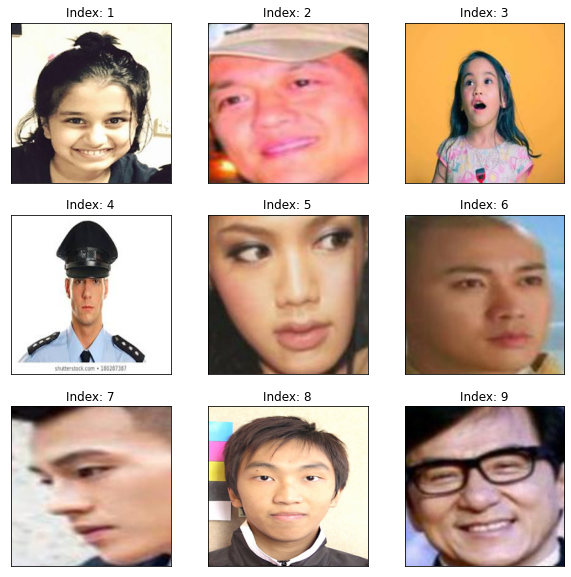

In [206]:
fig = plt.figure(figsize=(10, 10))

for i in range(1, 10):
    # im = mpimg.imread("/content/Images/Test/No_Mask/" + random.choice(os.listdir("/content/Images/Test/No_Mask")))
    im = Image.open("/content/Images/Test/No_Mask/" + random.choice(os.listdir("/content/Images/Test/No_Mask")))
    im = im.resize((250, 250))
    ax = fig.add_subplot(3, 3, i)
    # ax.set_title("Mask\n{} x {}".format(row, col))
    ax.set_title("Index: {}".format(i))
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(im)
plt.show()